In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv('stud_math.csv')

In [3]:
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [94]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [171]:
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [108]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


### school

In [6]:
df.school.unique()

array(['GP', 'MS'], dtype=object)

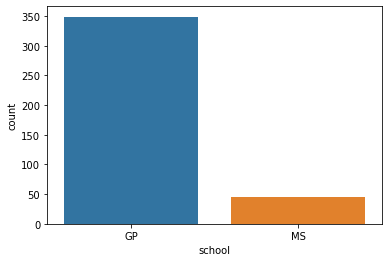

In [16]:
sns.countplot(data = df, x = df.school)

### sex

In [18]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

### Age

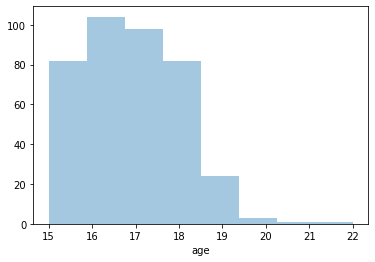

In [31]:
sns.distplot(df.age, kde = False, bins = 8)

In [33]:
df.age.value_counts().sort_index()

15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

### Address

In [76]:
df.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [81]:
df.address.unique()

array(['U', 'R'], dtype=object)

In [82]:
df.address.value_counts()

U    312
R     83
Name: address, dtype: int64

In [80]:
df.address.fillna(df.address.value_counts().idxmax(), inplace = True)

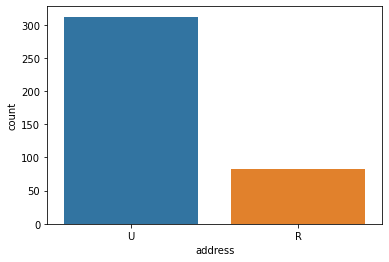

In [84]:
sns.countplot(df.address)

### family size

In [87]:
df.famsize

0      NaN
1      GT3
2      LE3
3      GT3
4      GT3
      ... 
390    LE3
391    LE3
392    GT3
393    LE3
394    LE3
Name: famsize, Length: 395, dtype: object

In [88]:
df.loc[:,['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [91]:
df.famsize.value_counts()

GT3    288
LE3    107
Name: famsize, dtype: int64

In [90]:
df.famsize.fillna(df.famsize.value_counts().idxmax(), inplace = True)

### pstatus

In [96]:
df.pstatus

0        A
1      NaN
2        T
3        T
4        T
      ... 
390      A
391      T
392      T
393      T
394      T
Name: pstatus, Length: 395, dtype: object

In [99]:
df.pstatus.value_counts()

T    359
A     36
Name: pstatus, dtype: int64

In [98]:
df.pstatus.fillna(df.pstatus.value_counts().idxmax(), inplace = True)

### medu

In [158]:
df.medu.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

In [173]:
df.medu.describe()

count    395.000000
mean       2.746835
std        1.095310
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

In [157]:
df.medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

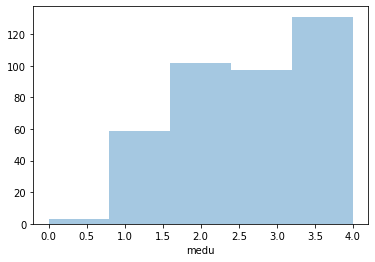

In [106]:
sns.distplot(df.medu, bins = 5, kde = False)

In [156]:
df.medu = df.medu.apply(lambda x: None if x == 'NaN' else x)

In [172]:
df.medu = df.apply(medu_filling, axis = 1)

In [169]:
def medu_filling(row):
    if pd.isnull(row['medu']):
        if row['fedu'] == 4:
            return 4
        if row['fedu'] == 3:
            return 3
        if row['fedu'] < 3:
            return 2
        if row['fedu'].isnull():
            return row['medu']
    return row['medu']

### fedu

In [154]:
df.fedu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

In [149]:
df.fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

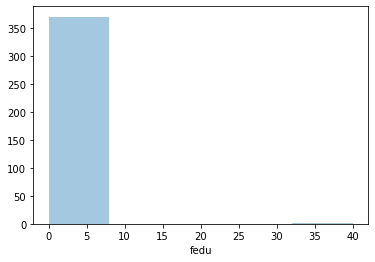

In [141]:
sns.distplot(df.fedu, bins = 5, kde = False)

In [148]:
df.fedu = df.fedu.apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)

In [125]:
df.fedu = df.fedu.astype(float)

In [150]:
df.loc[df.fedu < 5]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [155]:
df[['medu', 'fedu']]

,medu,fedu
0,4.0,4.0
1,1.0,1.0
2,1.0,1.0
3,4.0,2.0
4,3.0,3.0
...,...,...
390,2.0,2.0
391,3.0,1.0
392,1.0,1.0
393,3.0,2.0


In [164]:
df.loc[df.medu.isnull()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,...,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,...,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,...,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0
